<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section_2_Project_modeling(linear-regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 분석

# 필수 라이브러리 설치

In [1]:
# 라이브러리 설치
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders

# for Ridge, Lasso normalize=True options
# 해당 라이브러리 설치 후 런타임 다시 시작 -> 이후 셀 진행
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.filterwarnings(action='ignore')



데이터셋 가져오기

In [3]:
naver_shop = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/naver_shop_FE_comp.csv')

In [4]:
naver_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              16426 non-null  object
 1   Low price          16426 non-null  int64 
 2   Mall Name          16426 non-null  object
 3   Product Type       16426 non-null  int64 
 4   Maker              16426 non-null  object
 5   Brand              16426 non-null  object
 6   category1          16426 non-null  object
 7   category2          16426 non-null  object
 8   category3          16426 non-null  object
 9   Price_range        16426 non-null  object
 10  Maker Point        16426 non-null  int64 
 11  Brand Point        16426 non-null  int64 
 12  Price_range_score  16426 non-null  int64 
 13  Total Point        16426 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


In [5]:
naver_shop

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point,Brand Point,Price_range_score,Total Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1,3,2,7
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1,1,2,4
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0,0,2,2
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0,1,2,3
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16422,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1,3,2,7
16423,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16424,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0,3,2,6


In [ ]:
# 'maker' 컬럼의 카디널리티 확인
maker_cardinality = len(naver_shop['Maker'].unique())
print('maker 카디널리티:', maker_cardinality)

# 'brand' 컬럼의 카디널리티 확인
brand_cardinality = len(naver_shop['Brand'].unique())
print('brand 카디널리티:', brand_cardinality)

# 'category1' 컬럼의 카디널리티 확인
category1_cardinality = len(naver_shop['category1'].unique())
print('category1 카디널리티:', category1_cardinality)

# 'category2' 컬럼의 카디널리티 확인
category2_cardinality = len(naver_shop['category2'].unique())
print('category2 카디널리티:', category2_cardinality)

# 'category3' 컬럼의 카디널리티 확인
category3_cardinality = len(naver_shop['category3'].unique())
print('category3 카디널리티:', category3_cardinality)


# 'Price_range' 컬럼의 카디널리티 확인
Price_range_cardinality = len(naver_shop['Price_range'].unique())
print('Price_range 카디널리티:', Price_range_cardinality)



maker 카디널리티: 427
brand 카디널리티: 891
category1 카디널리티: 2
category2 카디널리티: 5
category3 카디널리티: 18
Price_range 카디널리티: 5


키디널리티가 높은 컬럼은 Feature Engineering을 통해 수치화 작업완료

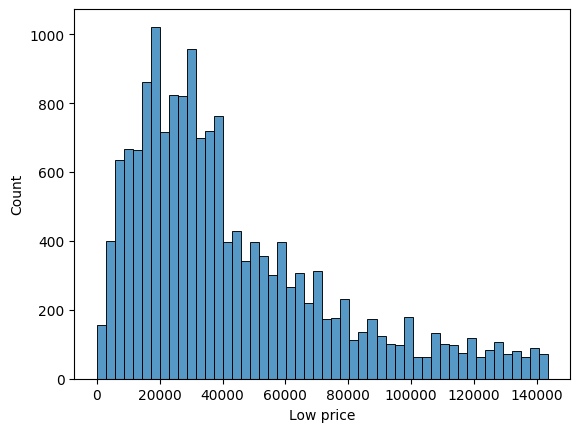

In [6]:
# 타겟 분포 확인
sns.histplot(naver_shop['Low price'], bins=50);

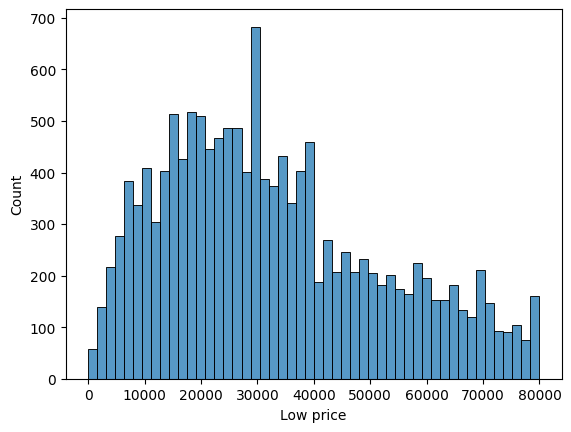

In [7]:
# 'Low price' 값이 100,000보다 작은 데이터만 추출하여 'naver_shop_cl' 데이터프레임 생성
naver_shop_cl = naver_shop[naver_shop['Low price'] < 80000]

# 'Low price' 컬럼의 히스토그램 그리기
sns.histplot(naver_shop_cl['Low price'], bins=50);

<Axes: xlabel='Price_range_encoded', ylabel='count'>

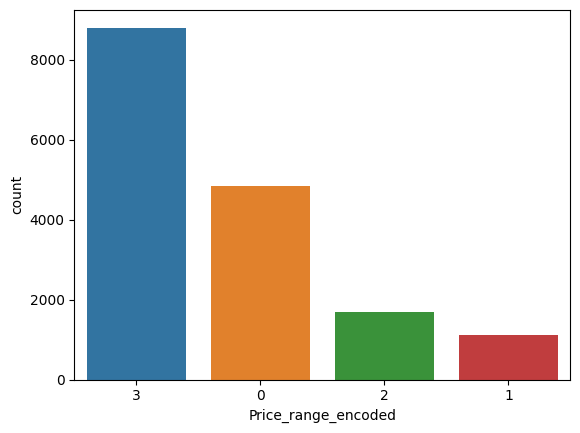

In [8]:
# 'Price_range' 컬럼을 라벨 인코딩하여 'Price_range_encoded' 변수에 저장
encoder = LabelEncoder()
encoder.fit(['Very Cheap', 'Cheap', 'Moderate', 'Expensive'])  # 순서 지정
naver_shop = naver_shop.dropna(subset=['Price_range'])
naver_shop['Price_range_encoded'] = encoder.transform(naver_shop['Price_range'])

order = naver_shop['Price_range_encoded'].value_counts().index.tolist()
sns.countplot(x='Price_range_encoded', data=naver_shop, order=order)


<Axes: xlabel='Price_range', ylabel='count'>

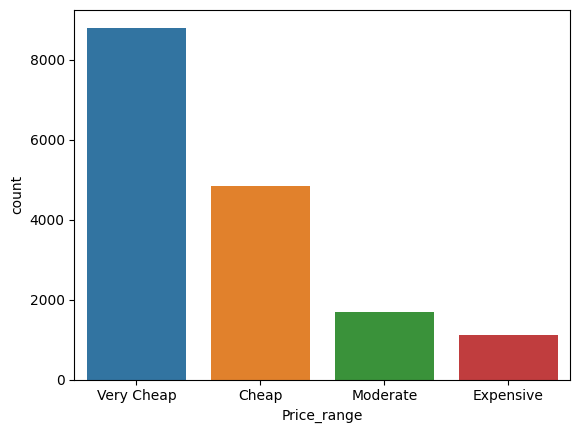

In [9]:
# 데이터 금액 구간을 나눠 4분류로 했을때
# 'Price_range' 컬럼을 범주형 변수로 변환
naver_shop['Price_range'] = pd.Categorical(naver_shop['Price_range'], categories=['Very Cheap', 'Cheap', 'Moderate', 'Expensive'], ordered=True)

# 'Price_range' 변수의 분포 확인
sns.countplot(x='Price_range', data=naver_shop)

<Axes: >

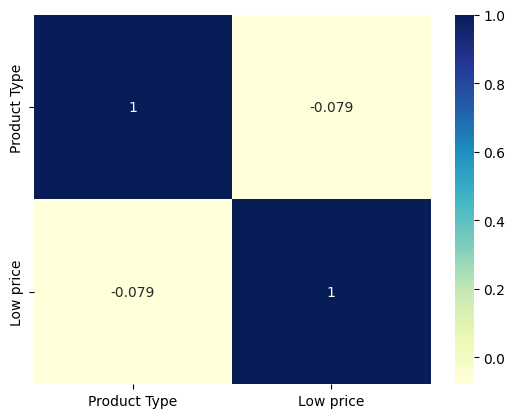

In [10]:
# 'Product Type'과 'Low price' 간의 상관계수 구하기
corr = naver_shop[['Product Type', 'Low price']].corr()

# 상관도 히트맵 그리기
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# Modeling

In [30]:
# 기준모델 생성
baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
baseline_mse = mean_squared_error(y_train, baseline)
baseline_rmse = np.sqrt(baseline_mse)

# 결과 출력
print(f'기준모델의 r2_score: {baseline_r2}')
print(f"기준 모델의 MAE: {baseline_mae:.3f}")
print(f"기준 모델의 MSE: {baseline_mse:.3f}")
print(f"기준 모델의 RMSE: {baseline_rmse:.3f}")

기준모델의 r2_score: 0.0
기준 모델의 MAE: 25276.555
기준 모델의 MSE: 1038864107.634
기준 모델의 RMSE: 32231.415


In [21]:
# 독립 변수와 타겟 변수 선택
X_cols = ['Maker Point', 'Brand Point', 'Price_range_score','Total Point']
y_col = 'Low price'
X = naver_shop[X_cols]
y = naver_shop[y_col]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train 데이터와 test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# train, test 데이터가 잘 나눠졌는지 확인.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13140, 4), (3286, 4), (13140,), (3286,))

In [34]:
# 선형회귀 모델 만들기
ols = LinearRegression()

# 모델 학습
ols.fit(X_train, y_train)

# 성능 평가
train_score = np.round(ols.score(X_train, y_train), 3)
val_score = np.round(np.mean(cross_val_score(ols, X_train, y_train, scoring='r2', cv=3)), 3)
test_score = np.round(ols.score(X_test, y_test), 3)

# 모델 예측
y_pred = ols.predict(X_test)

# MAE, MSE, RMSE, R^2 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


R^2: 0.682
MAE: 14944.828
MSE: 327887645.633
RMSE: 18107.668


# one-hot-encoding(category3)


In [35]:
# category3 변수에 대해 one-hot encoding을 수행
category3_encoded = pd.get_dummies(naver_shop['category3'], prefix='category3')

# 인코딩된 데이터를 원본 데이터에 병합
naver_shop = pd.concat([naver_shop, category3_encoded], axis=1)

# 독립 변수와 타겟 변수 선택
X_cols_ohe = ['Maker Point', 'Brand Point', 'Price_range_score'] + list(category3_encoded.columns)
y_col_ohe = 'Low price'
X_ohe = naver_shop[X_cols_ohe]
y_ohe = naver_shop[y_col_ohe]

# 데이터 정규화
scaler_ohe = StandardScaler()
X_scaled_ohe = scaler.fit_transform(X)

# train 데이터와 test 데이터로 분할
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_scaled_ohe, y_ohe, test_size=0.2, random_state=42)

# 선형회귀 모델 만들기
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_ohe, y_train_ohe)

# 성능 평가
train_score_ohe = np.round(ols.score(X_train_ohe, y_train_ohe), 3)
val_score_ohe = np.round(np.mean(cross_val_score(ols, X_train_ohe, y_train_ohe, scoring='r2', cv=3)), 3)
test_score_ohe = np.round(ols.score(X_test_ohe, y_test_ohe), 3)

# 결과 출력
print(f'학습 세트 r2_score : {train_score_ohe}')
# 모델 예측
y_pred = ols.predict(X_test_ohe)

# MAE, MSE, RMSE 계산
mae_ohe = mean_absolute_error(y_test_ohe, y_pred)
mse_ohe = mean_squared_error(y_test_ohe, y_pred)
rmse_ohe = np.sqrt(mse_ohe)

# 결과 출력
print(f"MAE: {mae_ohe:.3f}")
print(f"MSE: {mse_ohe:.3f}")
print(f"RMSE: {rmse_ohe:.3f}")

학습 세트 r2_score : 0.69
MAE: 14944.828
MSE: 327887645.633
RMSE: 18107.668
